In [1]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Aquire data 
The data was aquired from Kaggle https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/data   
then read the train data and the test data


In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
test_labels = pd.read_csv('datasets/gender_submission.csv')
print(f'The shape of the traning data {train_df.shape}')
print(f'The shape of the testing data {test_df.shape}')

The shape of the traning data (891, 12)
The shape of the testing data (418, 11)


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# test_labeled = test_df.set_index('PassengerId').join(test_labels.set_index('PassengerId'))
# test_labeled.head()

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# What is the distribution of categorical features?

Names are unique across the dataset (count=unique=891)  
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).  
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.  
Embarked takes three possible values. S port used by most passengers (top=S)  
Ticket feature has high ratio (22%) of duplicate values (unique=681).  

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Betros, Mr. Tannous",male,1601,G6,S
freq,1,577,7,4,644


# Assumtions based on data analysis
1. We arrive at following assumptions based on data analysis done so far.   
2. We may validate these assumptions further before taking appropriate actions.

## Correlating.

We want to know how well does each feature correlate with Survival. 
We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

## Completing.

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

## Correcting.

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

## Creating.

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.
##Classifying.

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.

# Analyze data
* as shown below the Pclass and the Sex have high correllation with surviving therefore they will be selected as features for the model
* while some of the SibSp and Parch have values with 0 correlation we can feature engineer a feature from the 2 for a better correlation

In [11]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualization
### correlating numerical values  
Observations.

Infants (Age <=4) had high survival rate.  
Oldest passengers (Age = 80) survived.  
Large number of 15-25 year olds did not survive.  
Most passengers are in 15-35 age range.   
* Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.  

We should consider Age (our assumption classifying #2) in our model training.  
Complete the Age feature for null values (completing #1).  
We should band age groups (creating #3).  

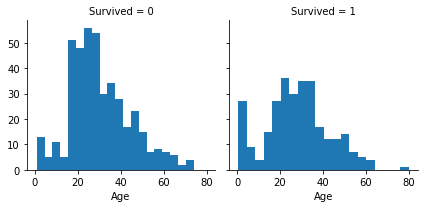

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


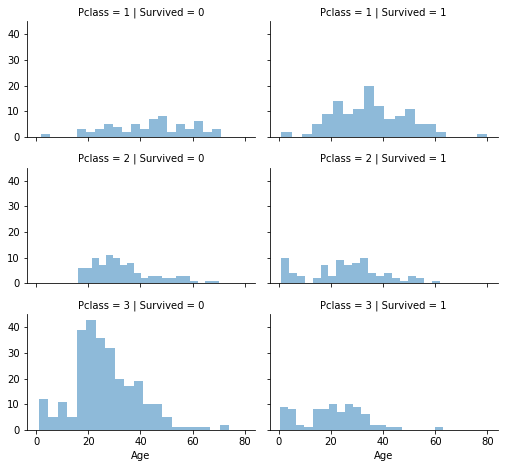

In [16]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

## Correlating categorical features
we will add the Sex feature and complete the embarked and add it to the model

C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


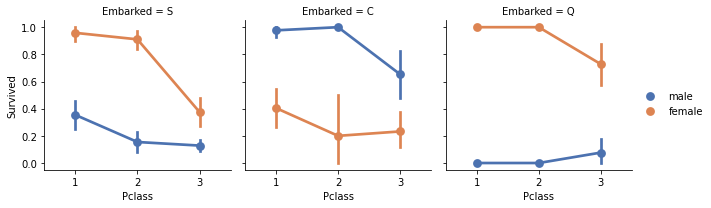

In [17]:
grid = sns.FacetGrid(train_df, col='Embarked')
# grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived', 'Sex', palette='deep')
grid.add_legend()

## Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

Observations.

Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).
Decisions.

Consider banding Fare feature.

C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


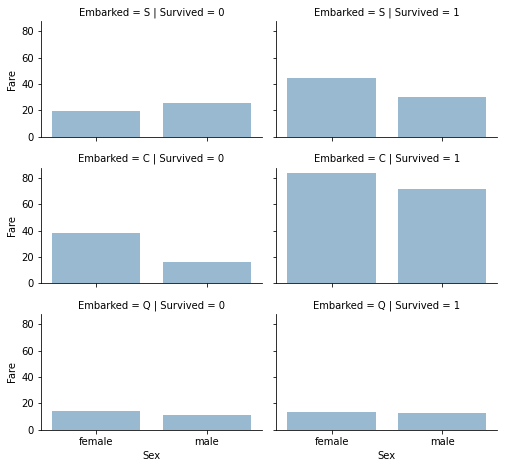

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Data Wrangling


Correcting by dropping features¶
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [19]:
print('Before', train_df.shape, test_df.shape)
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)
test_df = test_df.drop(['Ticket','Cabin'],axis = 1)
print('After', train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


Combine variable is used to automate the process of cleaning and tidying the data of the training_set and the testing_set in one loop

In [20]:
combine = [train_df,test_df]
combine[0].shape

(891, 10)

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand = False)
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We can replace many titles with a more common name or classify them as Rare.

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset.Title.replace('Mlle', 'Miss')
    dataset['Title'] = dataset.Title.replace('Ms', 'Miss')
    dataset['Title'] = dataset.Title.replace('Mme', 'Mrs')
    

In [24]:
train_df[['Title','Survived']].groupby(['Title'],as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
one_hot_train = pd.get_dummies(train_df.Title, prefix='Title_')
train_df = train_df.drop('Title',axis = 1)
train_df = train_df.join(one_hot_train)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0


In [26]:
one_hot_test = pd.get_dummies(test_df.Title, prefix='Title_')
test_df = test_df.drop('Title',axis = 1)
test_df = test_df.join(one_hot_test)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,0,1,0


In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 13), (418, 13))

## Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0

In [28]:
for dataset in combine:
    dataset["Sex"] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare
0,0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,S,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,S,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,S,0,0,1,0,0


C:\Users\Omar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


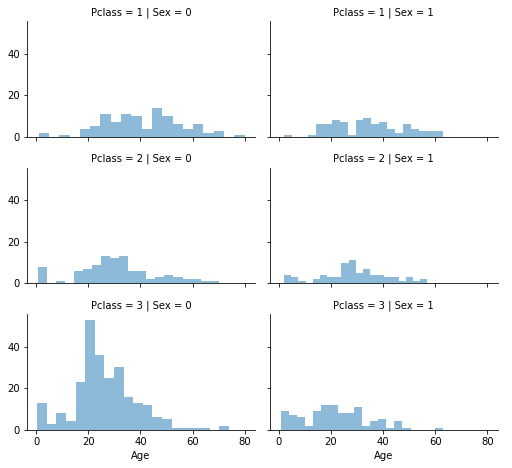

In [29]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [30]:
# trial = train_df.groupby(['Pclass']).transform(lambda x: x.fillna(x.median()))

In [31]:
# trial.head()


In [32]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare
0,0,3,0,22,1,0,7.2500,S,0,0,1,0,0
1,1,1,1,38,1,0,71.2833,C,0,0,0,1,0
2,1,3,1,26,0,0,7.9250,S,0,1,0,0,0
3,1,1,1,35,1,0,53.1000,S,0,0,0,1,0
4,0,3,0,35,0,0,8.0500,S,0,0,1,0,0


Let us create Age bands and determine correlations with Survived.

In [34]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
# for ordinal encoding
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
# train_df.head()

In [36]:
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)

In [37]:
one_hot_train = pd.get_dummies(train_df.AgeBand,prefix="Age")
train_df = train_df.drop(['Age'],axis =1)
train_df = train_df.join(one_hot_train)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,AgeBand,"Age_(-0.08, 16.0]","Age_(16.0, 32.0]","Age_(32.0, 48.0]","Age_(48.0, 64.0]","Age_(64.0, 80.0]"
0,0,3,0,1,0,7.2500,S,0,0,1,0,0,"(16.0, 32.0]",0,1,0,0,0
1,1,1,1,1,0,71.2833,C,0,0,0,1,0,"(32.0, 48.0]",0,0,1,0,0
2,1,3,1,0,0,7.9250,S,0,1,0,0,0,"(16.0, 32.0]",0,1,0,0,0
3,1,1,1,1,0,53.1000,S,0,0,0,1,0,"(32.0, 48.0]",0,0,1,0,0
4,0,3,0,0,0,8.0500,S,0,0,1,0,0,"(32.0, 48.0]",0,0,1,0,0


In [38]:
one_hot_test = pd.get_dummies(test_df.AgeBand,prefix="Age")
test_df = test_df.drop(['Age'],axis =1)
test_df = test_df.join(one_hot_test)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,AgeBand,"Age_(-0.076, 15.2]","Age_(15.2, 30.4]","Age_(30.4, 45.6]","Age_(45.6, 60.8]","Age_(60.8, 76.0]"
0,892,3,0,0,0,7.8292,Q,0,0,1,0,0,"(30.4, 45.6]",0,0,1,0,0
1,893,3,1,1,0,7.0000,S,0,0,0,1,0,"(45.6, 60.8]",0,0,0,1,0
2,894,2,0,0,0,9.6875,Q,0,0,1,0,0,"(60.8, 76.0]",0,0,0,0,1
3,895,3,0,0,0,8.6625,S,0,0,1,0,0,"(15.2, 30.4]",0,1,0,0,0
4,896,3,1,1,1,12.2875,S,0,0,0,1,0,"(15.2, 30.4]",0,1,0,0,0


In [39]:
combine = [train_df,test_df]


### Create new feature combining existing features¶
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [42]:
train_df = train_df.drop(['AgeBand','Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['AgeBand','Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.08, 16.0]","Age_(16.0, 32.0]","Age_(32.0, 48.0]","Age_(48.0, 64.0]","Age_(64.0, 80.0]",IsAlone
0,0,3,0,7.2500,S,0,0,1,0,0,0,1,0,0,0,0
1,1,1,1,71.2833,C,0,0,0,1,0,0,0,1,0,0,0
2,1,3,1,7.9250,S,0,1,0,0,0,0,1,0,0,0,1
3,1,1,1,53.1000,S,0,0,0,1,0,0,0,1,0,0,0
4,0,3,0,8.0500,S,0,0,1,0,0,0,0,1,0,0,1


### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [43]:
freq_embark = train_df['Embarked'].dropna().mode()[0]
freq_embark

'S'

In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_embark)

train_df[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived',ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


One-Hot encoding the Embarked Feature

In [45]:
one_hot_embark = pd.get_dummies(train_df.Embarked,prefix = "Embarked_")
train_df = train_df.drop('Embarked',axis = 1)
train_df = train_df.join(one_hot_embark)
train_df.head()

,Survived,Pclass,Sex,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.08, 16.0]","Age_(16.0, 32.0]","Age_(32.0, 48.0]","Age_(48.0, 64.0]","Age_(64.0, 80.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S
0,0,3,0,7.2500,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,1,1,1,71.2833,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,3,1,7.9250,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,1,1,1,53.1000,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,3,0,8.0500,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [46]:
one_hot_embark_test = pd.get_dummies(test_df.Embarked,prefix = "Embarked_")
test_df = test_df.drop('Embarked',axis = 1)
test_df = test_df.join(one_hot_embark_test)
test_df.head()

,PassengerId,Pclass,Sex,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.076, 15.2]","Age_(15.2, 30.4]","Age_(30.4, 45.6]","Age_(45.6, 60.8]","Age_(60.8, 76.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S
0,892,3,0,7.8292,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,893,3,1,7.0000,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,894,2,0,9.6875,0,0,1,0,0,0,0,0,0,1,1,0,1,0
3,895,3,0,8.6625,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,896,3,1,12.2875,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [47]:
combine = [train_df,test_df]

### Quick completing and converting a numeric feature¶
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [48]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.076, 15.2]","Age_(15.2, 30.4]","Age_(30.4, 45.6]","Age_(45.6, 60.8]","Age_(60.8, 76.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S
0,892,3,0,7.8292,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,893,3,1,7.0000,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,894,2,0,9.6875,0,0,1,0,0,0,0,0,0,1,1,0,1,0
3,895,3,0,8.6625,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,896,3,1,12.2875,0,0,0,1,0,0,1,0,0,0,0,0,0,1


We used pd.qcut instead of pd.cut since the Fare of each class will be closer to each others therefore pd.qcut is more   
correct to group each fare class together

In [49]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)

In [51]:
one_hot_fareband = pd.get_dummies(train_df.FareBand,prefix = "FareBand")
train_df = train_df.drop(['FareBand','Fare'],axis = 1)
train_df = train_df.join(one_hot_fareband)
train_df.head()

,Survived,Pclass,Sex,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.08, 16.0]","Age_(16.0, 32.0]",...,"Age_(48.0, 64.0]","Age_(64.0, 80.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S,"FareBand_(-0.001, 7.91]","FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,3,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,3,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [52]:
one_hot_fare_test = pd.get_dummies(test_df.FareBand,prefix = "FareBand")
test_df = test_df.drop(['FareBand','Fare'],axis = 1)
test_df = test_df.join(one_hot_fare_test)
test_df.head()

,PassengerId,Pclass,Sex,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.076, 15.2]","Age_(15.2, 30.4]",...,"Age_(45.6, 60.8]","Age_(60.8, 76.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S,"FareBand_(-0.001, 7.896]","FareBand_(7.896, 14.454]","FareBand_(14.454, 31.472]","FareBand_(31.472, 512.329]"
0,892,3,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,893,3,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,894,2,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3,895,3,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,896,3,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [53]:
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Rare,"Age_(-0.08, 16.0]","Age_(16.0, 32.0]",...,"Age_(48.0, 64.0]","Age_(64.0, 80.0]",IsAlone,Embarked__C,Embarked__Q,Embarked__S,"FareBand_(-0.001, 7.91]","FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,3,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,3,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5,0,3,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
6,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
7,0,3,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8,1,3,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
9,1,2,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# Model, predict and solve¶
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

In [54]:
X_train = train_df.drop('Survived',axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 20), (891,), (418, 20))

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability)

In [56]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.524586
2,Title__Master,1.302951
5,Title__Mrs,0.715129
7,"Age_(-0.08, 16.0]",0.682385
8,"Age_(16.0, 32.0]",0.441805
12,IsAlone,0.416264
13,Embarked__C,0.263884
17,"FareBand_(7.91, 14.454]",0.137523
14,Embarked__Q,0.077200
3,Title__Miss,0.068004


In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.73

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

In [59]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.68

In [60]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [61]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.15

In [62]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.85

In [63]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [65]:
import tensorflow as tf
from tensorflow import keras


In [66]:
My_model = keras.Sequential([
    keras.Input(shape=(891,20)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])
My_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
My_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 891, 256)          5376      
_________________________________________________________________
dense_1 (Dense)              (None, 891, 192)          49344     
_________________________________________________________________
dense_2 (Dense)              (None, 891, 64)           12352     
_________________________________________________________________
dense_3 (Dense)              (None, 891, 32)           2080      
_________________________________________________________________
dense_4 (Dense)              (None, 891, 1)            33        
Total params: 69,185
Trainable params: 69,185
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = My_model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
28/28 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7632
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.8036
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8260
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8597
Epoch 70/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8541
Epoch 71/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8575: 0s - loss: 0.2975 - accuracy: 0.85
Epoch 72/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8597
Epoch 73/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8631
Epoch 74/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8552
Epoch 75/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8586
Epoch 76/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8586
Epoch 77/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.8575
Epoch 78/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3

In [68]:
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_train.shape

(891, 20)

In [69]:
y_pred = My_model.predict(X_test)
y_pred

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[4.58893084e-08],
       [2.84928858e-01],
       [2.65466902e-08],
       [1.78419828e-01],
       [5.55677652e-01],
       [2.52260387e-01],
       [7.31471300e-01],
       [3.08091015e-01],
       [9.99977708e-01],
       [2.05680728e-03],
       [1.13361746e-01],
       [2.27079421e-01],
       [7.06208587e-01],
       [8.90931988e-05],
       [9.99999523e-01],
       [9.98196721e-01],
       [1.51026798e-05],
       [2.05385685e-01],
       [2.75056362e-01],
       [3.52983475e-02],
       [3.30805391e-01],
       [9.62608218e-01],
       [9.99982238e-01],
       [5.02692938e-01],
       [1.00000000e+00],
       [4.78531583e-05],
       [1.00000000e+00],
       [2.05385685e-01],
       [6.59889877e-01],
       [5.23871124e-01],
       [3.57717276e-04],
       [2.95737386e-03],
       [5.33303916e-01],
       [5.03679216e-01],
       [5.02692938e-01],
       [2.05385685e-01],
       [3.79009426e-01],
       [3.79009426e-01],
       [1.78419828e-01],
       [5.35198510e-01],


In [70]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
y_pred.shape

(418, 1)

In [71]:
y_test = test_labels['Survived'].to_numpy()
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
from sklearn.metrics import accuracy_score
nn_model = accuracy_score(y_test, y_pred) *100
nn_model

82.29665071770334

In [78]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [79]:
#XGBoost
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train)
Y_pred = xgb_classifier.predict(X_test)
acc_xgb_classifier = round(xgb_classifier.score(X_train, Y_train) * 100, 2)
acc_xgb_classifier

86.76

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoost','NN Model'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_xgb_classifier,nn_model]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.760000
8,Decision Tree,86.760000
9,XGBoost,86.760000
1,KNN,84.290000
0,Support Vector Machines,83.730000
10,NN Model,82.296651
2,Logistic Regression,82.150000
7,Linear SVC,82.150000
4,Naive Bayes,78.680000
5,Perceptron,78.000000


In [85]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission.csv', index=False)

In [86]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
